In [1]:
import pandas as pd
import yfinance as yf
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [2]:
sp = pd.read_csv('sp500.csv')
sp

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...,...
18287,2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,0,0
18288,2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,0,0
18289,2022-09-08,3959.939941,4010.500000,3944.810059,4006.179932,0,0,0
18290,2022-09-09,4022.939941,4076.810059,4022.939941,4067.360107,0,0,0


In [3]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18292 entries, 0 to 18291
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18292 non-null  object 
 1   Open          18292 non-null  float64
 2   High          18292 non-null  float64
 3   Low           18292 non-null  float64
 4   Close         18292 non-null  float64
 5   Volume        18292 non-null  int64  
 6   Dividends     18292 non-null  int64  
 7   Stock Splits  18292 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 1.1+ MB


In [4]:
sp.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,18292.000000,18292.000000,18292.000000,18292.000000,1.829200e+04,18292.0,18292.0
mean,697.008453,727.595441,718.676269,723.423144,1.079258e+09,0.0,0.0
std,967.795811,954.976227,943.865472,949.782722,1.676948e+09,0.0,0.0
min,0.000000,16.660000,16.660000,16.660000,0.000000e+00,0.0,0.0
25%,0.000000,88.475002,86.977503,87.720001,9.910000e+06,0.0,0.0
50%,235.485001,236.849998,233.934998,235.560005,1.274000e+08,0.0,0.0
75%,1178.050018,1185.165009,1169.640045,1178.109985,1.560400e+09,0.0,0.0
max,4804.509766,4818.620117,4780.040039,4796.560059,1.145623e+10,0.0,0.0


In [5]:
sp.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [6]:
sp.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [7]:
sp.count()

Date            18292
Open            18292
High            18292
Low             18292
Close           18292
Volume          18292
Dividends       18292
Stock Splits    18292
dtype: int64

In [8]:
sp = yf.Ticker("^GSPC")

In [9]:
sp = sp.history(period="max")
sp

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03 00:00:00-05:00,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04 00:00:00-05:00,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05 00:00:00-05:00,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06 00:00:00-05:00,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09 00:00:00-05:00,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2022-10-13 00:00:00-04:00,3520.370117,3685.409912,3491.580078,3669.909912,5021680000,0,0
2022-10-14 00:00:00-04:00,3690.409912,3712.000000,3579.679932,3583.070068,4243030000,0,0
2022-10-17 00:00:00-04:00,3638.649902,3689.729980,3638.649902,3677.949951,4352780000,0,0


In [10]:
sp.index

DatetimeIndex(['1950-01-03 00:00:00-05:00', '1950-01-04 00:00:00-05:00',
               '1950-01-05 00:00:00-05:00', '1950-01-06 00:00:00-05:00',
               '1950-01-09 00:00:00-05:00', '1950-01-10 00:00:00-05:00',
               '1950-01-11 00:00:00-05:00', '1950-01-12 00:00:00-05:00',
               '1950-01-13 00:00:00-05:00', '1950-01-16 00:00:00-05:00',
               ...
               '2022-10-06 00:00:00-04:00', '2022-10-07 00:00:00-04:00',
               '2022-10-10 00:00:00-04:00', '2022-10-11 00:00:00-04:00',
               '2022-10-12 00:00:00-04:00', '2022-10-13 00:00:00-04:00',
               '2022-10-14 00:00:00-04:00', '2022-10-17 00:00:00-04:00',
               '2022-10-18 00:00:00-04:00', '2022-10-19 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=18319, freq=None)

<AxesSubplot:xlabel='Date'>

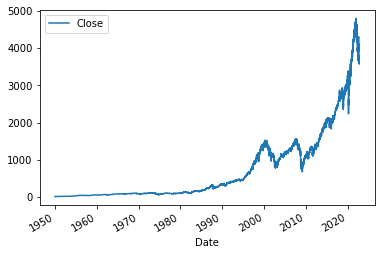

In [11]:
sp.plot.line(y="Close", use_index=True)

In [12]:
del sp["Dividends"]
del sp["Stock Splits"]

In [13]:
sp

,Open,High,Low,Close,Volume
Date,,,,,
1950-01-03 00:00:00-05:00,16.660000,16.660000,16.660000,16.660000,1260000
1950-01-04 00:00:00-05:00,16.850000,16.850000,16.850000,16.850000,1890000
1950-01-05 00:00:00-05:00,16.930000,16.930000,16.930000,16.930000,2550000
1950-01-06 00:00:00-05:00,16.980000,16.980000,16.980000,16.980000,2010000
1950-01-09 00:00:00-05:00,17.080000,17.080000,17.080000,17.080000,2520000
...,...,...,...,...,...
2022-10-13 00:00:00-04:00,3520.370117,3685.409912,3491.580078,3669.909912,5021680000
2022-10-14 00:00:00-04:00,3690.409912,3712.000000,3579.679932,3583.070068,4243030000
2022-10-17 00:00:00-04:00,3638.649902,3689.729980,3638.649902,3677.949951,4352780000


In [14]:
sp["Tomorrow"] =sp["Close"].shift(-1)
sp

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1950-01-03 00:00:00-05:00,16.660000,16.660000,16.660000,16.660000,1260000,16.850000
1950-01-04 00:00:00-05:00,16.850000,16.850000,16.850000,16.850000,1890000,16.930000
1950-01-05 00:00:00-05:00,16.930000,16.930000,16.930000,16.930000,2550000,16.980000
1950-01-06 00:00:00-05:00,16.980000,16.980000,16.980000,16.980000,2010000,17.080000
1950-01-09 00:00:00-05:00,17.080000,17.080000,17.080000,17.080000,2520000,17.030001
...,...,...,...,...,...,...
2022-10-13 00:00:00-04:00,3520.370117,3685.409912,3491.580078,3669.909912,5021680000,3583.070068
2022-10-14 00:00:00-04:00,3690.409912,3712.000000,3579.679932,3583.070068,4243030000,3677.949951
2022-10-17 00:00:00-04:00,3638.649902,3689.729980,3638.649902,3677.949951,4352780000,3719.979980


In [15]:
sp["Target"] = (sp["Tomorrow"]>sp["Close"]).astype(int)
sp

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03 00:00:00-05:00,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1
1950-01-04 00:00:00-05:00,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1
1950-01-05 00:00:00-05:00,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1
1950-01-06 00:00:00-05:00,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1
1950-01-09 00:00:00-05:00,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0
...,...,...,...,...,...,...,...
2022-10-13 00:00:00-04:00,3520.370117,3685.409912,3491.580078,3669.909912,5021680000,3583.070068,0
2022-10-14 00:00:00-04:00,3690.409912,3712.000000,3579.679932,3583.070068,4243030000,3677.949951,1
2022-10-17 00:00:00-04:00,3638.649902,3689.729980,3638.649902,3677.949951,4352780000,3719.979980,1


Removinng all data that comes before Jan. 1st 1990

In [16]:
sp = sp.loc["1990-01-01":].copy()
sp

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-10-13 00:00:00-04:00,3520.370117,3685.409912,3491.580078,3669.909912,5021680000,3583.070068,0
2022-10-14 00:00:00-04:00,3690.409912,3712.000000,3579.679932,3583.070068,4243030000,3677.949951,1
2022-10-17 00:00:00-04:00,3638.649902,3689.729980,3638.649902,3677.949951,4352780000,3719.979980,1


In [17]:

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp.iloc[:-100]
test = sp.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [18]:


preds = model.predict(test[predictors])
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
preds = pd.Series(preds, index=test.index)
preds

Date
2022-05-27 00:00:00-04:00    1
2022-05-31 00:00:00-04:00    1
2022-06-01 00:00:00-04:00    1
2022-06-02 00:00:00-04:00    1
2022-06-03 00:00:00-04:00    1
                            ..
2022-10-13 00:00:00-04:00    1
2022-10-14 00:00:00-04:00    1
2022-10-17 00:00:00-04:00    1
2022-10-18 00:00:00-04:00    1
2022-10-19 00:00:00-04:00    1
Length: 100, dtype: int32

In [20]:
precision_score(test["Target"], preds)

0.3977272727272727

The above is not a good precision score because the stock price went up 39% of time when we predict it will go up. it will be better to trade against this model

<AxesSubplot:xlabel='Date'>

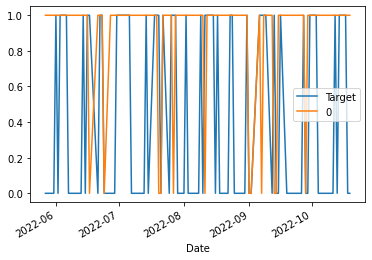

In [21]:
combined = pd.concat([test ["Target"], preds], axis=1)
combined.plot()

The above graph shows that the market price is down
Blue is Up
Yellow is down

In [22]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [23]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
        return pd.concat(all_predictions )

In [24]:
predictions = backtest(sp, model, predictors)


The value count is to tell us how many times each type of predictions are made. 0 is when the market will go down while 1 is when the market will go up

In [25]:
predictions["Predictions"].value_counts()

0    237
1     13
Name: Predictions, dtype: int64

In [26]:
precision_score(predictions['Target'], predictions["Predictions"])

0.46153846153846156

we are  46% accurate when we say the price will go up 
this is not a good precision 

In [27]:
predictions["Target"].value_counts() / predictions.shape[0]

0    0.516
1    0.484
Name: Target, dtype: float64

The SP model went down 51% of days and up 48% of days this is not a good precision

In [28]:
horizons = [2,5,30, 60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp.rolling(horizon).mean()
    
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp[ratio_column] = sp["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp[trend_column] = sp.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [29]:
sp

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_30,Trend_30,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-13 00:00:00-04:00,3520.370117,3685.409912,3491.580078,3669.909912,5021680000,3583.070068,0,1.012816,1.0,1.014469,1.0,0.966224,11.0,0.926481,24.0,0.861053,117.0,1.029042,544.0
2022-10-14 00:00:00-04:00,3690.409912,3712.000000,3579.679932,3583.070068,4243030000,3677.949951,1,0.988027,1.0,0.993573,1.0,0.946549,10.0,0.906144,23.0,0.841391,116.0,1.004431,544.0
2022-10-17 00:00:00-04:00,3638.649902,3689.729980,3638.649902,3677.949951,4352780000,3719.979980,1,1.013067,1.0,1.016188,2.0,0.973725,11.0,0.931252,24.0,0.864355,116.0,1.030747,544.0


In [30]:
sp = sp.dropna()
sp

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_30,Trend_30,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,0.999565,15.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997406,15.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000622,16.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006543,17.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.004945,16.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-12 00:00:00-04:00,3590.830078,3608.340088,3573.860107,3577.030029,4006830000,3669.909912,1,0.998352,0.0,0.984733,0.0,0.939420,10.0,0.901933,24.0,0.838630,117.0,1.003260,543.0
2022-10-13 00:00:00-04:00,3520.370117,3685.409912,3491.580078,3669.909912,5021680000,3583.070068,0,1.012816,1.0,1.014469,1.0,0.966224,11.0,0.926481,24.0,0.861053,117.0,1.029042,544.0
2022-10-14 00:00:00-04:00,3690.409912,3712.000000,3579.679932,3583.070068,4243030000,3677.949951,1,0.988027,1.0,0.993573,1.0,0.946549,10.0,0.906144,23.0,0.841391,116.0,1.004431,544.0


In [31]:
model =RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [32]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds>= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [33]:
predictions = backtest(sp, model, new_predictors)

In [34]:
predictions["Predictions"].value_counts()

0.0    237
1.0     13
Name: Predictions, dtype: int64

The above predictions shows that we will be purchasing stocks in few days
there is a probability that when we buy stocks on these days we will be able to sell when the price goes up

In [35]:
precision_score(predictions["Target"], predictions["Predictions"])

0.6153846153846154

This shows that in 61% the price will go up.
it is pretty good especailly as we are looking at time series data, historical prices of the index.
in conclusion :This should not be using for trading